In [75]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_curve, roc_auc_score,log_loss,classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, LogisticRegression, LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



In [77]:
hr = pd.read_csv("HR_comma_sep.csv")

In [79]:
X = hr.drop('left',axis = 1)
y = hr[['left']]

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3,stratify=y)

In [83]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
ct_ohe = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object) ),
                                  (ohe,make_column_selector(dtype_include = object) ),
                                  verbose_feature_names_out = False).set_output(transform = 'pandas')

scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()



In [85]:
dtc = DecisionTreeClassifier( random_state = 24)

pipe = Pipeline([('CT',ct_ohe),('SCL',None),('DTC',dtc)])
params = {'DTC__min_samples_split':[2,10,25,50],
          'DTC__min_samples_leaf':[1,10,25,50],
          'DTC__max_depth':[None,4,6]
         }
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 24)
gcv = GridSearchCV(pipe,param_grid = params,scoring = 'roc_auc',
                   cv = kfold, verbose = 3)




In [87]:
pipe.get_params()

{'memory': None,
 'steps': [('CT',
   ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x0000021ADBAF4200>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x0000021AD8450680>)],
                     verbose_feature_names_out=False)),
  ('SCL', None),
  ('DTC', DecisionTreeClassifier(random_state=24))],
 'verbose': False,
 'CT': ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021ADBAF4200>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_u

In [105]:
#gcv.fit(X_train,y_train)

In [107]:
# print(gcv.best_params_)
# print(gcv.best_score_)

In [109]:
gcv.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.976 total time=   0.0s
[CV 2/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.972 total time=   0.0s
[CV 3/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.972 total time=   0.0s
[CV 4/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.978 total time=   0.0s
[CV 5/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.976 total time=   0.0s
[CV 1/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=10;, score=0.984 total time=   0.0s
[CV 2/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=10;, score=0.979 total time=   0.0s
[CV 3/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=10;, score=0.979 total time=   0.0s

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021ADBAF4200>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021AD8450680>)],
                                                          verbose_feature_names_out=False)),
                                       ('SCL', None),
                                       ('DTC',
                                        DecisionTreeClassifier(random_state=24))]),
             param_grid={'DTC__max_depth': [None, 4, 6],
                         'DTC__min_samples_leaf': [1, 10, 25, 50],
                         'DTC__min_samples_split': [2, 10, 25, 50]},
             scoring='roc_auc', verbose=3)

In [110]:
print(gcv.best_params_)
print(gcv.best_score_)

{'DTC__max_depth': None, 'DTC__min_samples_leaf': 10, 'DTC__min_samples_split': 2}
0.9859959505714124


In [117]:
best_tree = gcv.best_estimator_

In [136]:
best_tree

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021ADC6CAC60>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021ADC6CA7B0>)],
                                   verbose_feature_names_out=False)),
                ('SCL', None),
                ('DTC',
                 DecisionTreeClassifier(min_samples_leaf=10, random_state=24))])

In [138]:
type(best_tree)

sklearn.pipeline.Pipeline

In [140]:
best_tree.named_steps

{'CT': ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021ADC6CAC60>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021ADC6CA7B0>)],
                   verbose_feature_names_out=False),
 'SCL': None,
 'DTC': DecisionTreeClassifier(min_samples_leaf=10, random_state=24)}

In [142]:
best_tree.named_steps['DTC']

DecisionTreeClassifier(min_samples_leaf=10, random_state=24)

In [144]:
best_tree.named_steps['CT']

ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021ADC6CAC60>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021ADC6CA7B0>)],
                  verbose_feature_names_out=False)

In [146]:
best_tree.named_steps['DTC'].feature_importances_

array([5.20970813e-01, 1.45602793e-01, 1.06079455e-01, 7.34661254e-02,
       1.48698815e-01, 2.85011419e-04, 3.65999798e-05, 0.00000000e+00,
       8.83493499e-05, 1.10257499e-04, 1.74835740e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.97893379e-04, 1.22494686e-04,
       8.05381965e-04, 3.96940288e-04, 1.56552021e-03, 5.98715372e-04])

In [150]:
best_tree.named_steps['CT'].get_feature_names_out()

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng',
       'Department_sales', 'Department_support', 'Department_technical',
       'salary_high', 'salary_low', 'salary_medium'], dtype=object)

##BEst tree

In [121]:
best_tree_model = gcv.best_estimator_.named_steps['DTC']

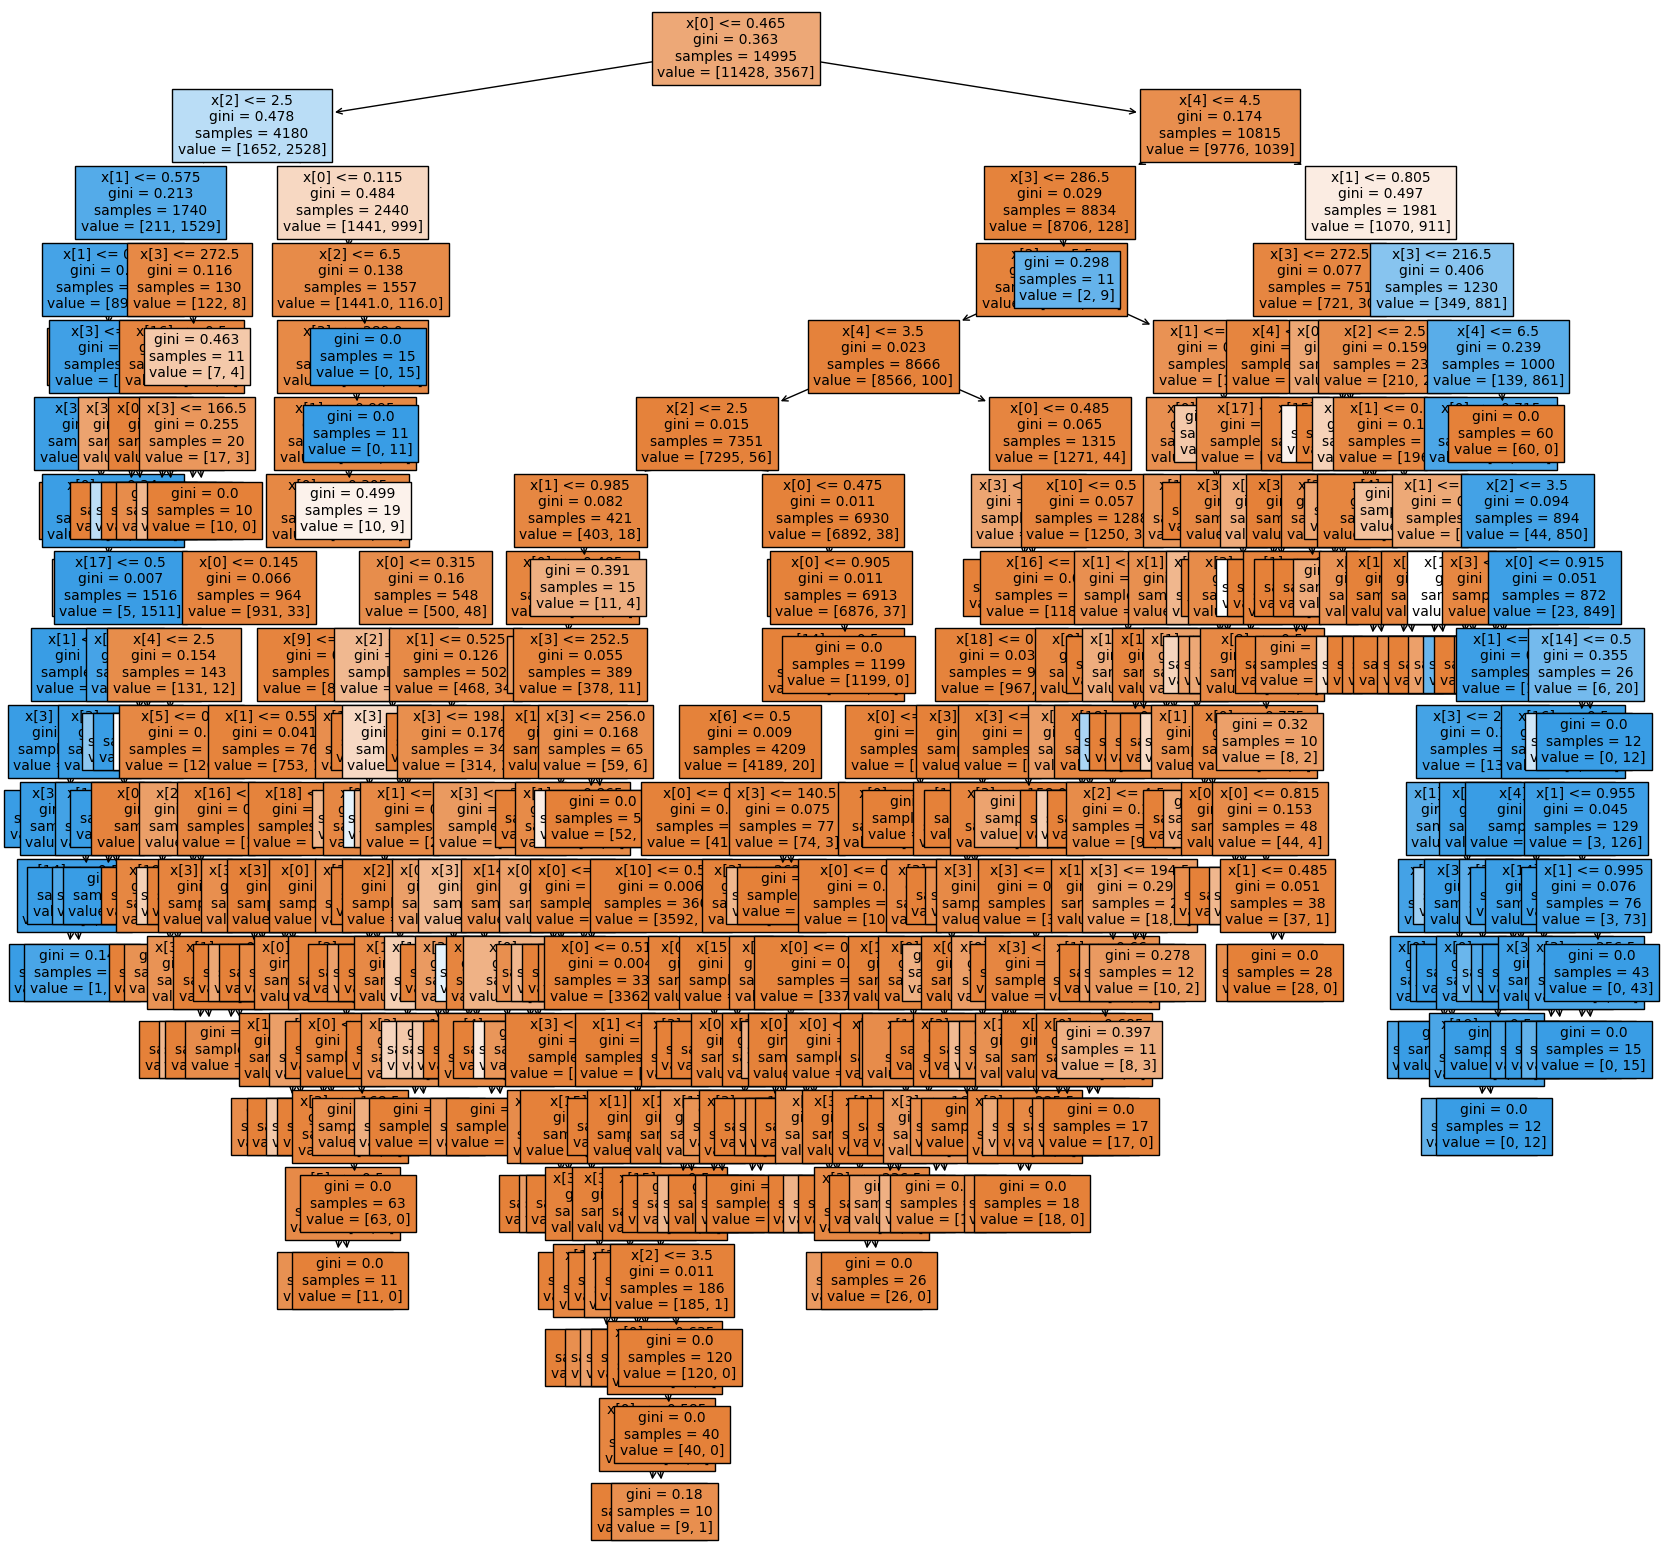

In [127]:
plt.figure(figsize=(20, 20))  # Adjust the size as needed
plot_tree(best_tree_model,  # Adjust based on your target classes
          filled=True,              # Color the tree nodes based on class
          fontsize=10)              # Adjust font size to fit the tree
plt.show()

In [ ]:
# df_imp.sort_values('importance', inplace = True)
# plt.barh(df_imp['feature'],df_imp['importance'])
# plt.title("feature Importances plot")
# plt.show()

In [154]:
df_imp = pd.DataFrame({'feature':list(gcv.best_estimator_.named_steps['CT'].get_feature_names_out()),
                      'importance': best_tree_model.feature_importances_ })
df_imp.sort_values('importance',inplace = True)

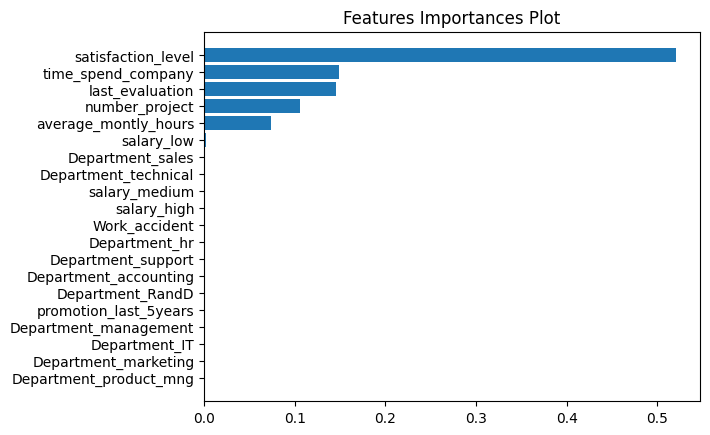

In [156]:
plt.barh(df_imp['feature'],df_imp['importance'])
plt.title("Features Importances Plot")
plt.show()